In [1]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from withClustAnalysis import *
from PixelEM import * 

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# compile MV PRJ result from each cluster to CSV
MV_df = compile_cluster_MV_prj_into_csv()
# Pick best clusters for each object sample based on MV
best_clust_df = best_worker_picking()
# compile all algo and MV PRJs into one big table
df = compile_all_algo_PRJs()
# compile the best threshold PRJs into one big table with algo as a column
df_best_thresh = compile_best_thresh_all_algo_PRJs()
# Extracting important clusters only
best_clust_best_thresh_df = filter_best_clust(df_best_thresh,best_clust_df)
best_clust_no_thresh_df  = filter_best_clust(df,best_clust_df)

# Debugging bad objects

In [4]:
basic_info=['clust', u'num_workers', u'objid','sample_num', u'thresh']

In [5]:
best_clust_best_thresh_df[(best_clust_best_thresh_df["j"]<0.80)&(best_clust_best_thresh_df["num_workers"]>=10)]

,sample_num,num_workers,objid,clust,algo,j,p,r,thresh
681,0,10,11,-1,GTLSA,0.789412,0.941094,0.830446,2
709,0,10,15,0,GT,0.691358,0.695172,0.992126,-2
714,0,10,15,0,isoGTLSA,0.785185,0.929825,0.834646,4
1240,0,15,11,-1,GTLSA,0.763398,0.906567,0.828589,2
1241,0,15,11,-1,MV,0.793026,0.896947,0.872525,0
1242,0,15,11,-1,basic,0.793026,0.896947,0.872525,-4
1268,0,15,15,0,GT,0.750369,0.750369,1.000000,2
1272,0,15,15,0,isoGT,0.775229,0.776417,0.998031,4
1798,0,20,11,-1,GT,0.772928,0.788394,0.975248,4
1827,0,20,15,0,GT,0.739003,0.743363,0.992126,4


In [6]:
# showing the P,R,J results of different thresholds on the unfiltered table
#df[(df["sample_num"]==sample_num)&(df["num_workers"]==num_workers)&(df["objid"]==objid)&(df["clust"]==cluster_id)][metric_J+basic_info]

In [7]:
# mega_mask = get_mega_mask(sample,objid,cluster_id)
# plt.imshow(mega_mask)
# plt.colorbar()

In [69]:
def visually_debug(sample,objid,cluster_id,algo,thresh):
    if cluster_id==-1 or cluster_id=="":
        PIXDIR = "pixel_em/{}/obj{}/".format(sample,objid)
    else:
        PIXDIR = "pixel_em/{}/obj{}/clust{}/".format(sample,objid,cluster_id)
    #pInT = pkl.load(open("{}{}_p_in_mask_ground_truth.pkl".format(PIXDIR,algo)))
    #pNotInT = pkl.load(open("{}{}_p_not_in_ground_truth.pkl".format(PIXDIR,algo)))
    gt = get_gt_mask(objid)*1.
    if algo!="MV":
        if os.path.exists("{}{}_gt_est_ground_truth_mask_thresh{}.pkl".format(PIXDIR,algo,thresh)):
            gt_est = pkl.load(open("{}{}_gt_est_ground_truth_mask_thresh{}.pkl".format(PIXDIR,algo,thresh)))
        else:
            gt_est = deriveGTinGroundTruthExperiments(sample,objid,algo,[thresh],cluster_id,exclude_isovote=False,SAVE_GT_MASK=False,rerun_existing=True)
        
        twoMaskOverlay(gt_est,gt)
        [p, r, j] = faster_compute_prj(gt_est,gt)
    else:
        MV = get_MV_mask(sample,objid,cluster_id)
        twoMaskOverlay(MV,gt)
        [p, r, j] = faster_compute_prj(MV,gt)
    plt.title("obj{} J={:.2f}".format(objid,j))
#     plt.figure()
#     plt.imshow(pInT)
#     plt.title("pInT")
#     plt.colorbar()
#     plt.figure()
#     plt.imshow(pNotInT)
#     plt.title("pNotInT")
#     plt.colorbar()
#     plt.figure()
#     plt.imshow(gt_est)
#     plt.title("gt_est")
#     plt.colorbar()
#    return pInT,pNotInT,gt_est,MV,gt

In [79]:
num_workers=20
sample_num=3
sample = "{}workers_rand{}".format(num_workers,sample_num)
objid=11
cluster_id=""
algo="GTLSA"

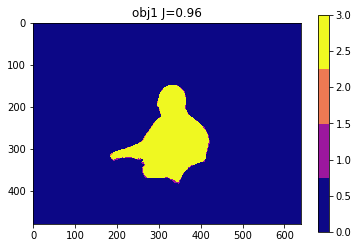

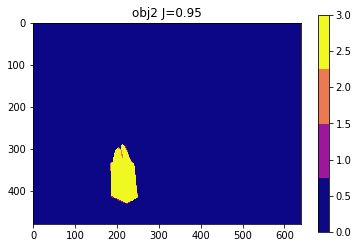

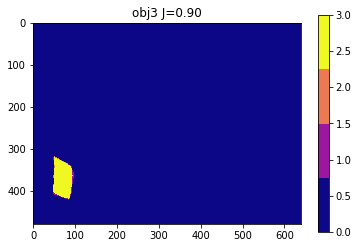

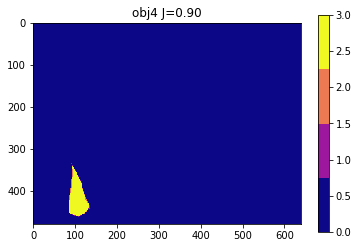

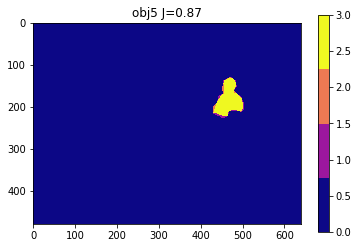

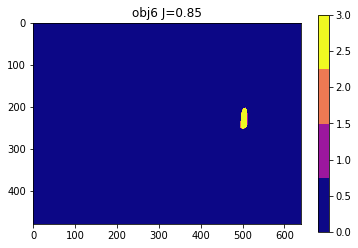

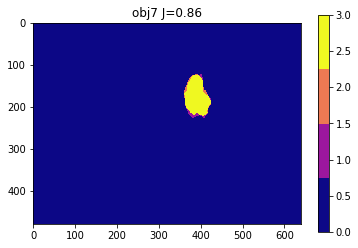

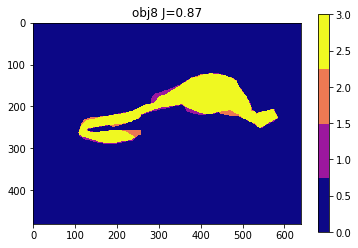

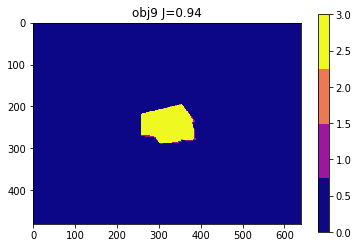

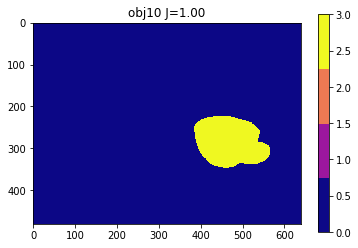

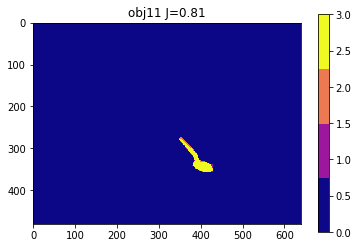

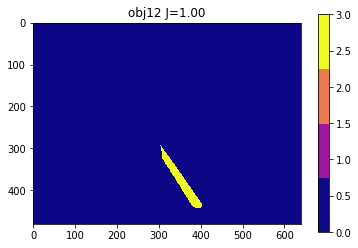

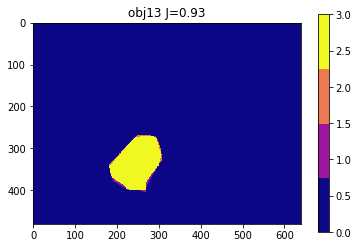

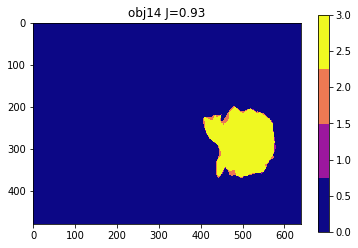

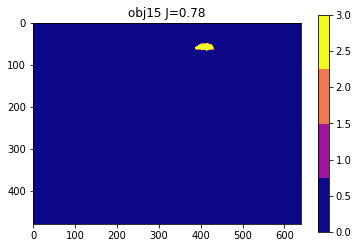

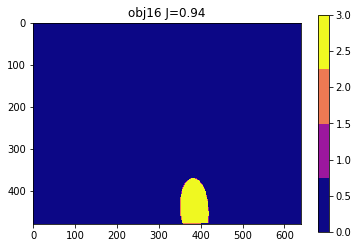

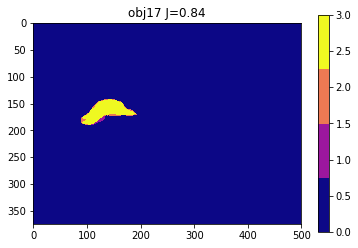

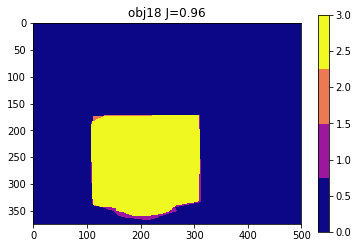

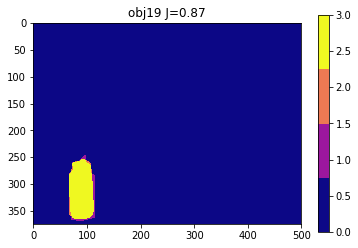

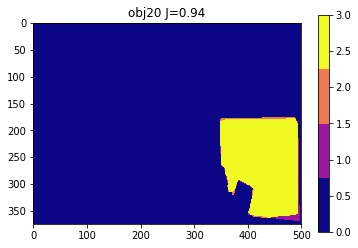

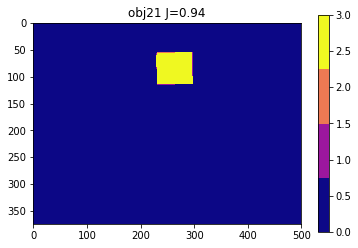

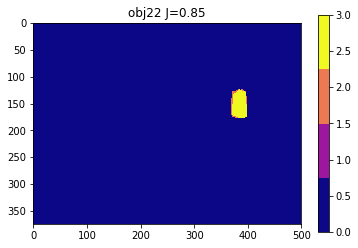

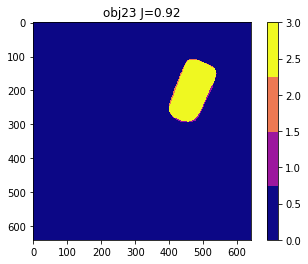

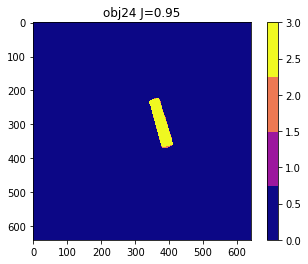

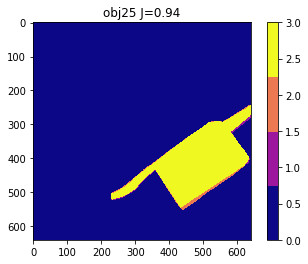

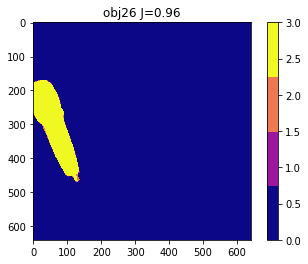

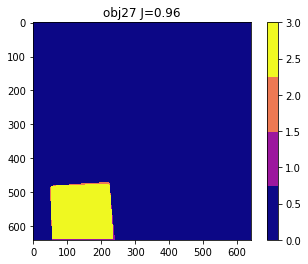

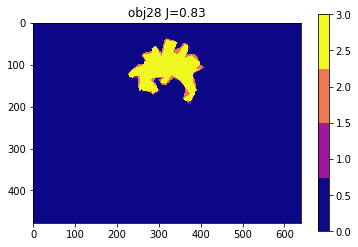

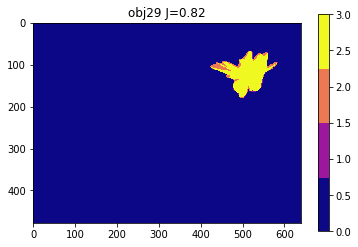

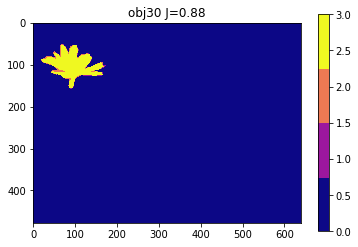

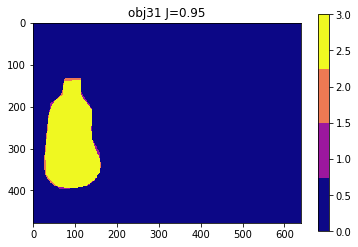

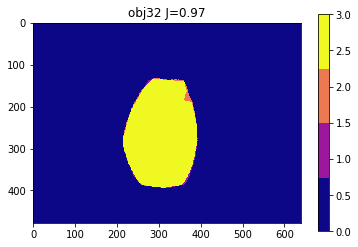

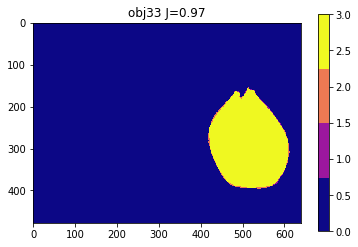

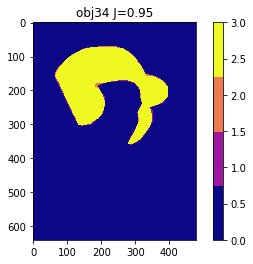

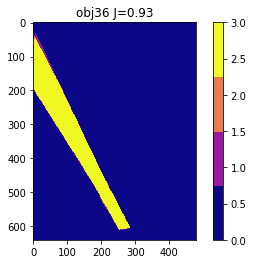

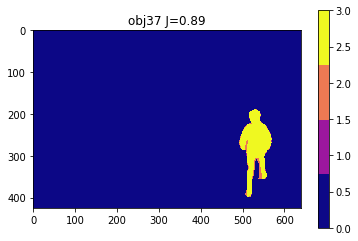

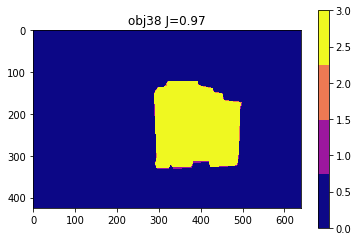

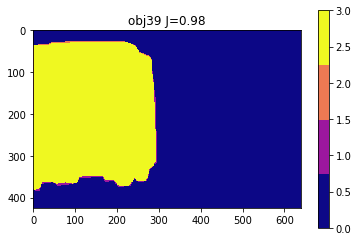

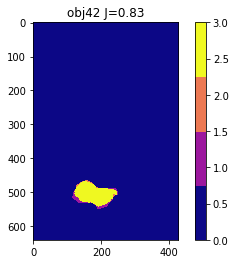

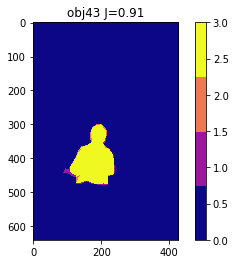

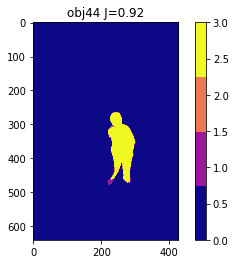

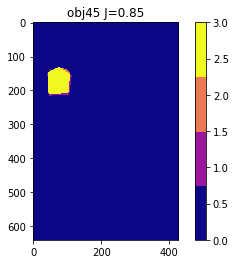

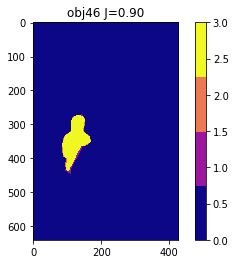

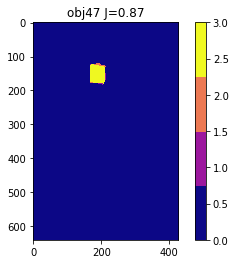

In [81]:
for objid in object_lst:
    visually_debug(sample,objid,cluster_id,"isoGT",0)

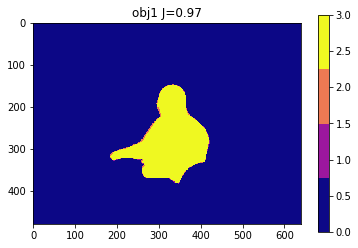

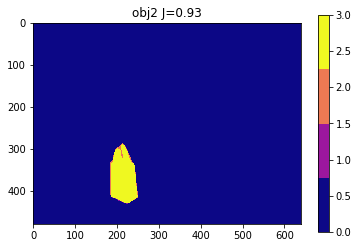

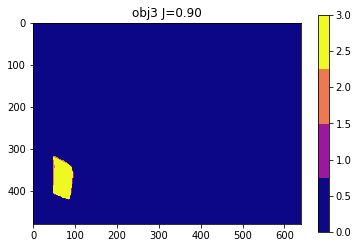

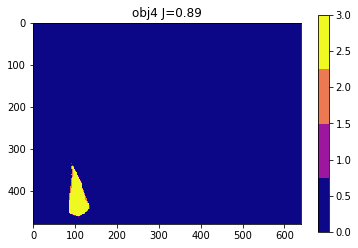

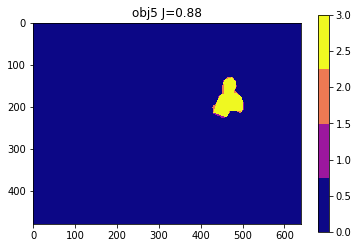

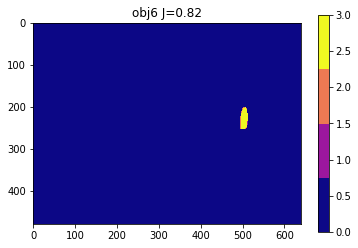

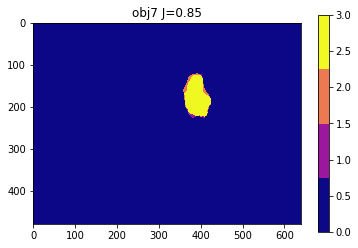

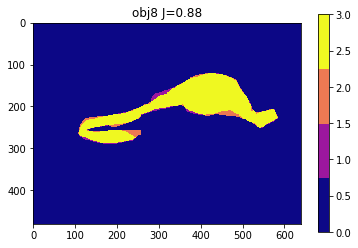

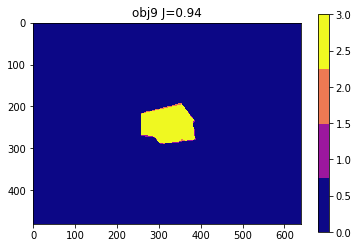

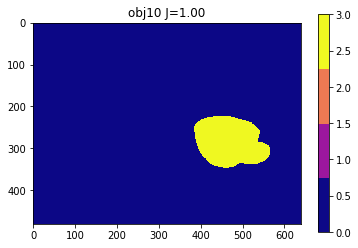

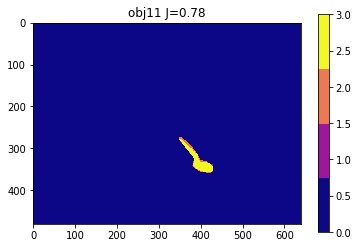

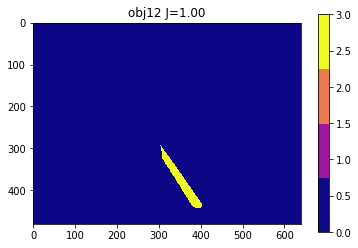

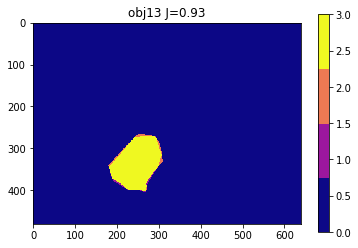

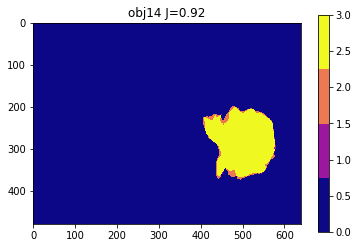

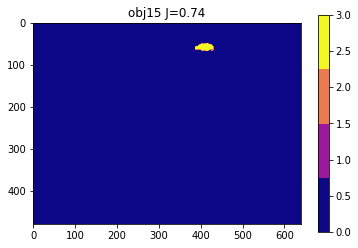

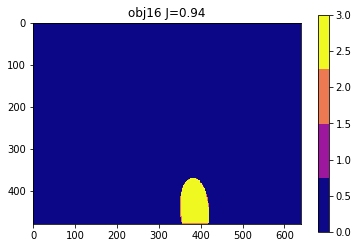

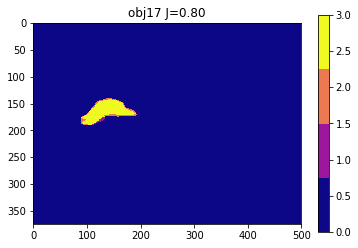

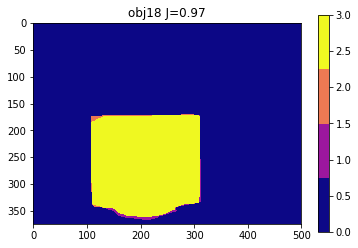

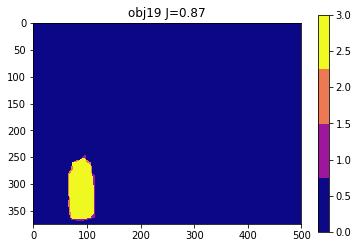

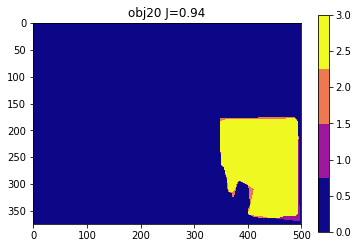

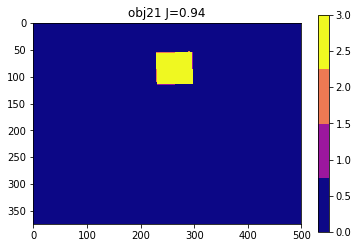

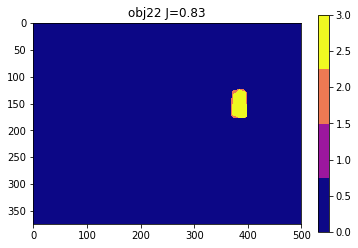

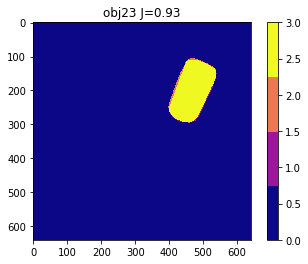

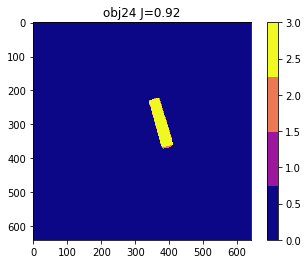

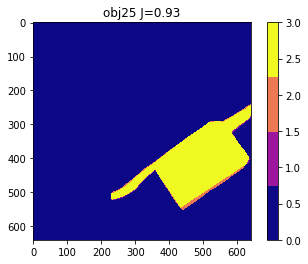

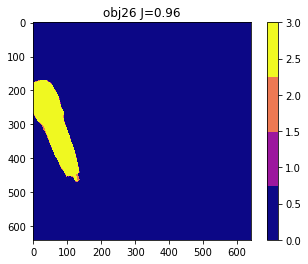

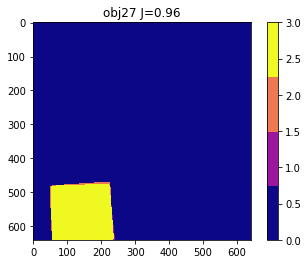

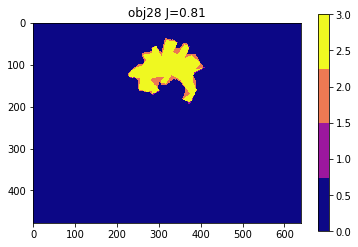

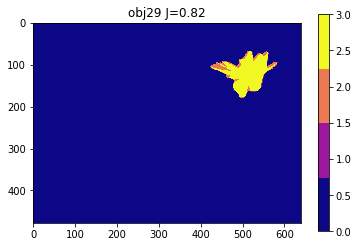

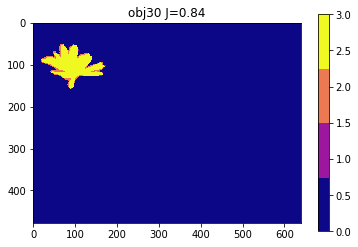

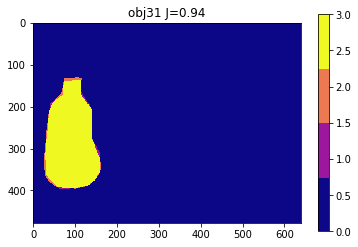

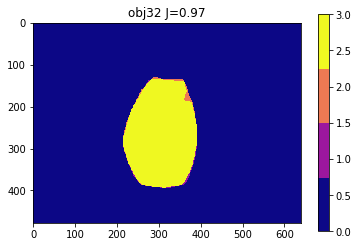

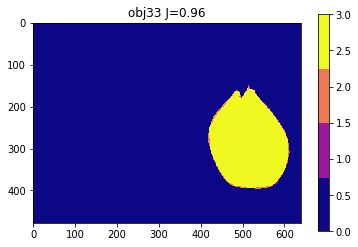

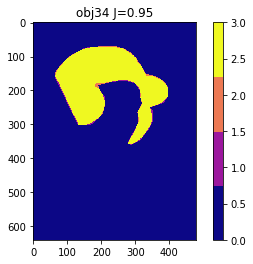

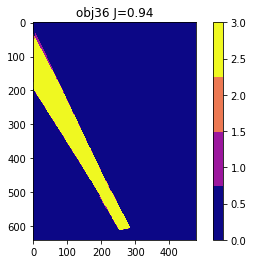

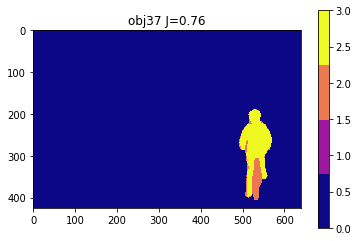

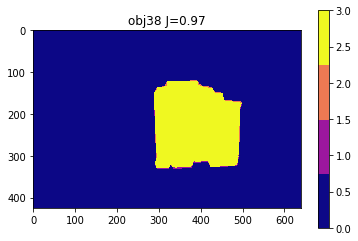

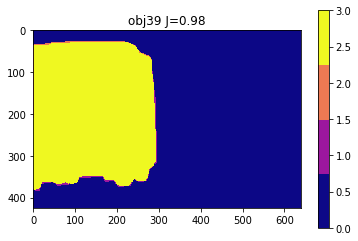

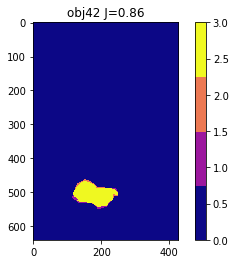

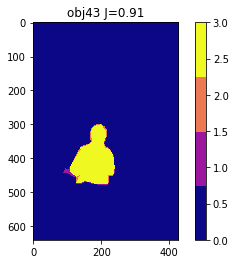

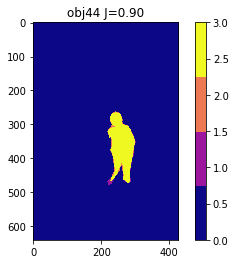

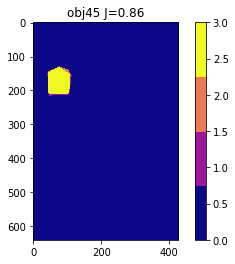

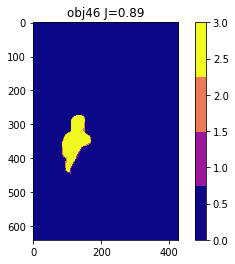

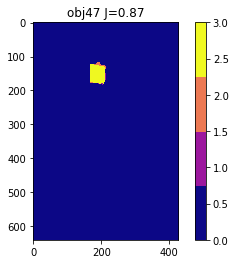

In [80]:
for objid in object_lst:
    visually_debug(sample,objid,cluster_id,"GT",0)

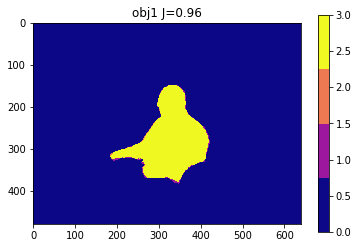

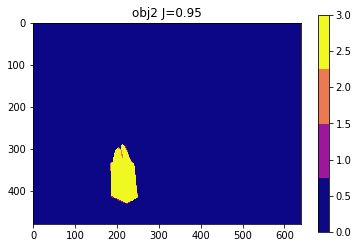

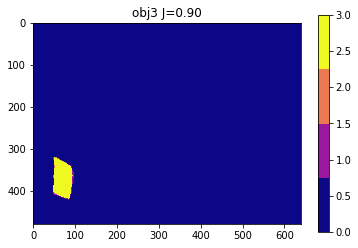

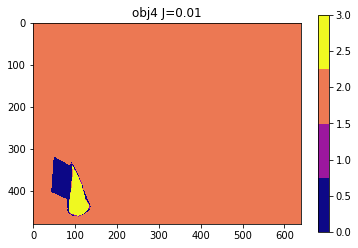

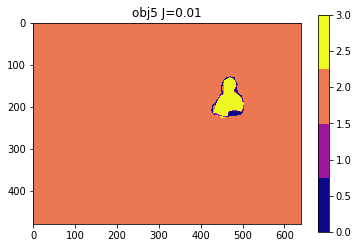

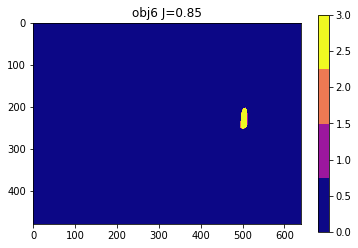

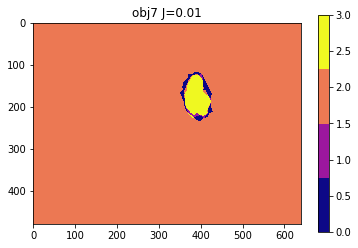

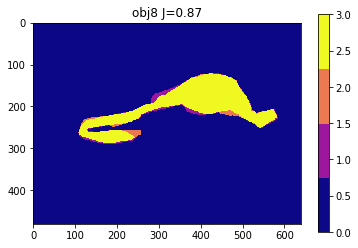

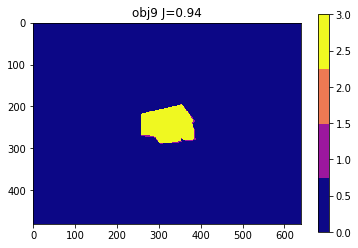

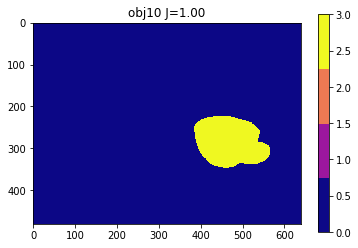

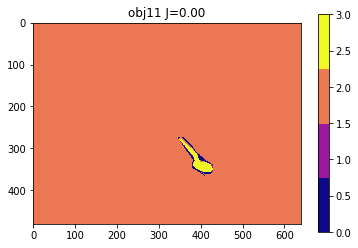

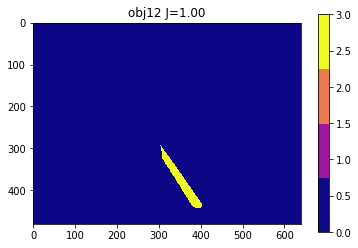

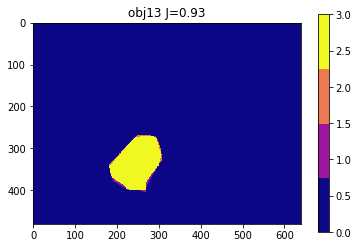

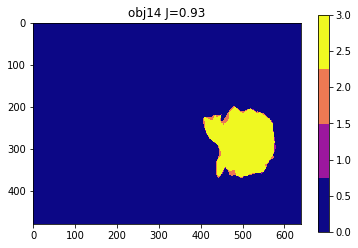

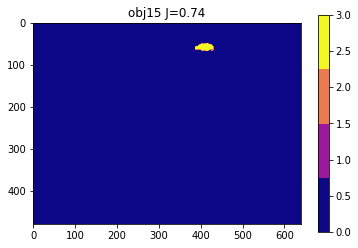

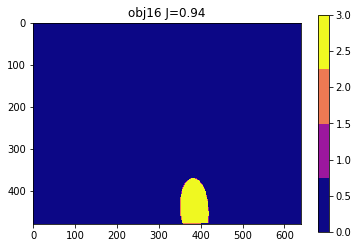

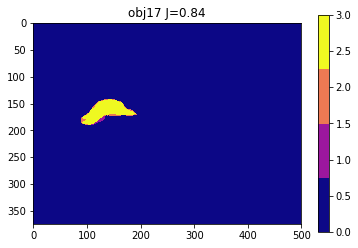

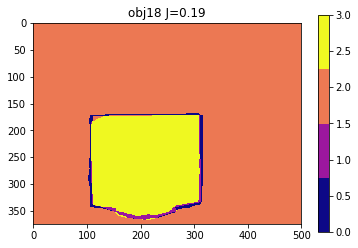

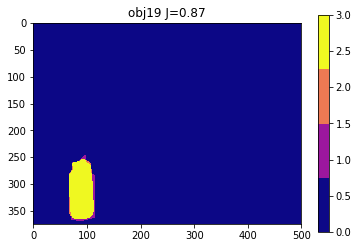

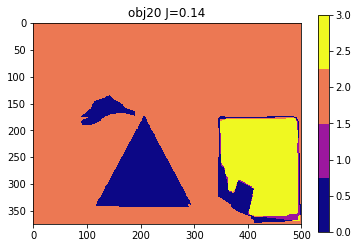

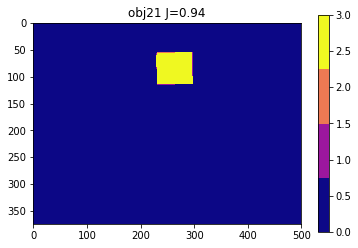

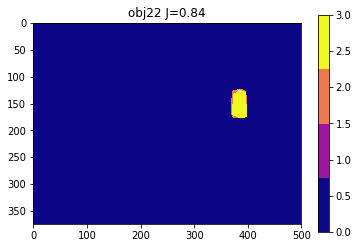

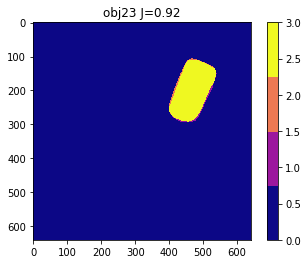

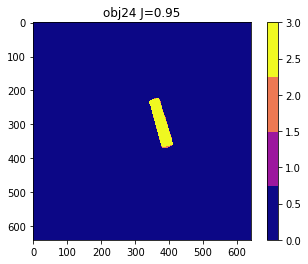

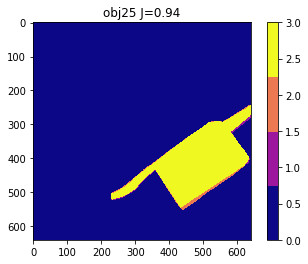

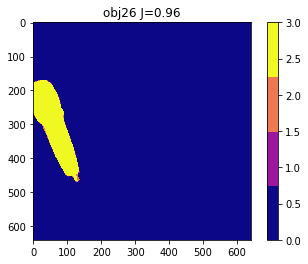

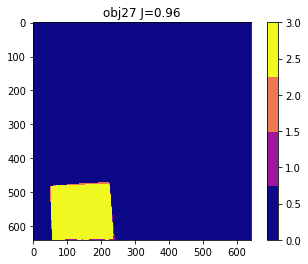

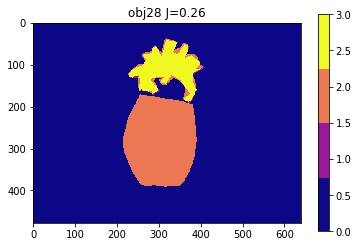

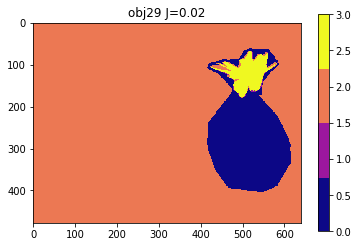

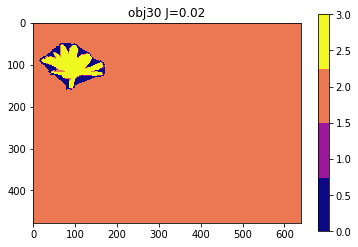

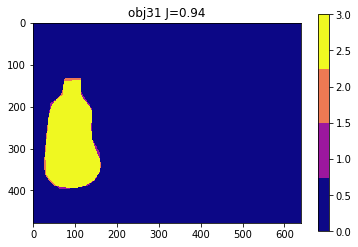

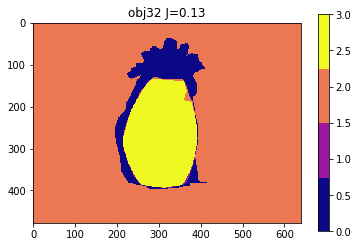

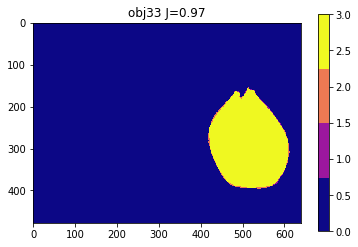

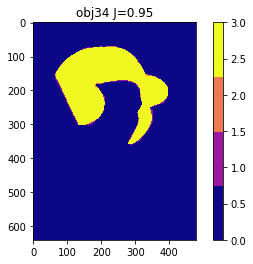

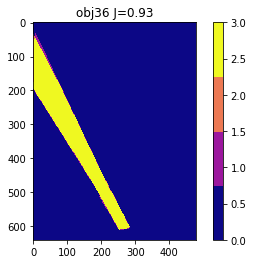

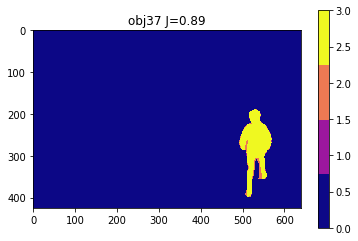

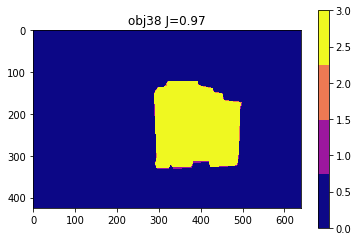

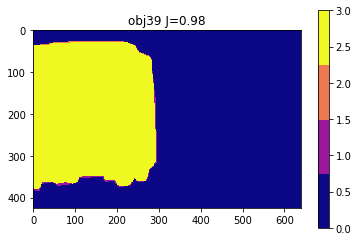

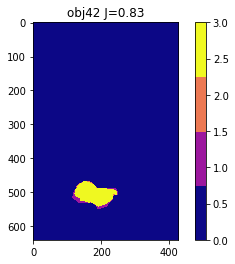

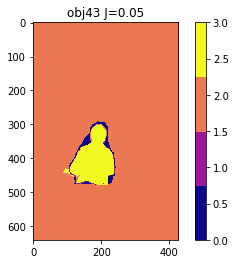

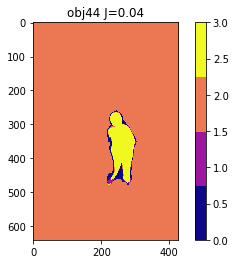

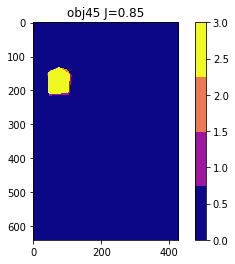

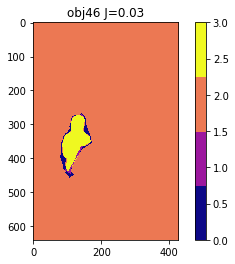

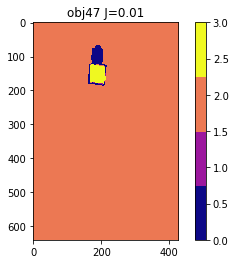

In [82]:
for objid in object_lst:
    visually_debug(sample,objid,cluster_id,"isoGTLSA",0)

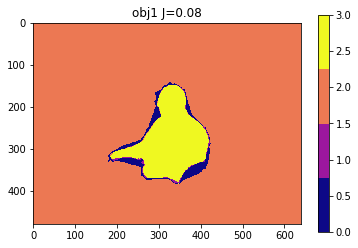

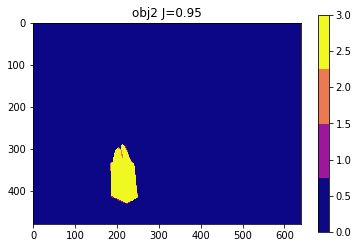

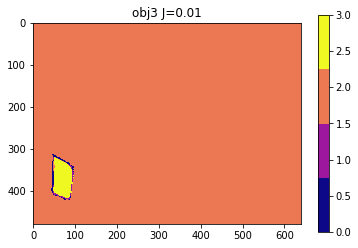

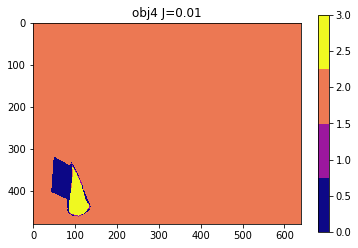

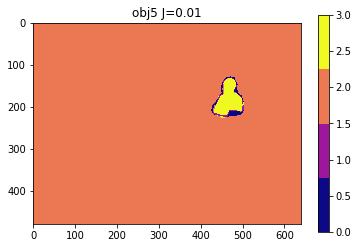

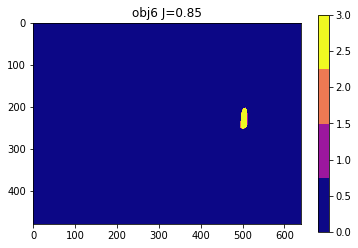

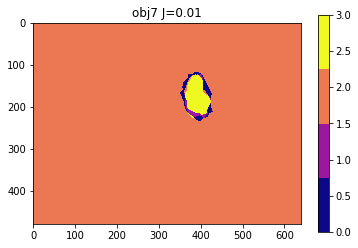

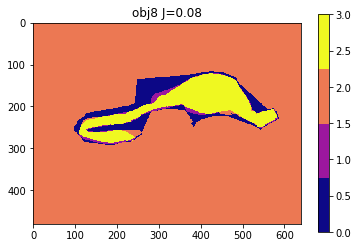

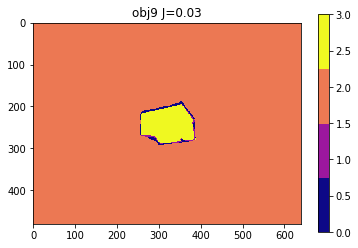

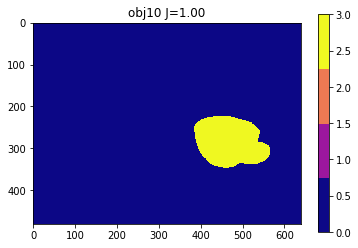

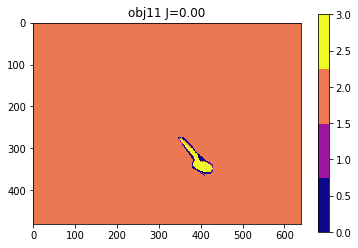

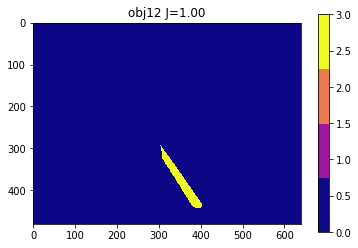

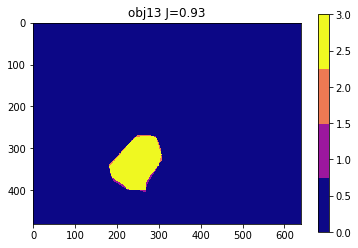

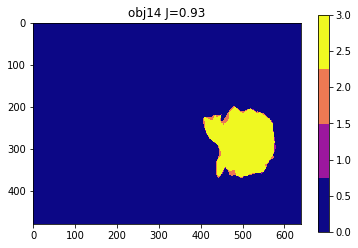

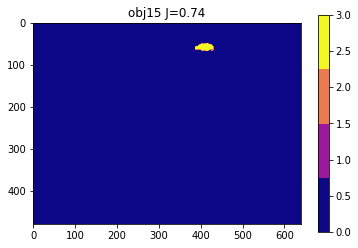

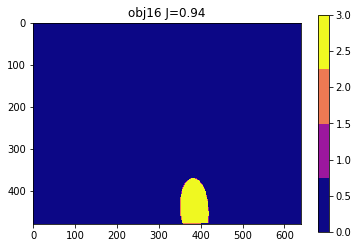

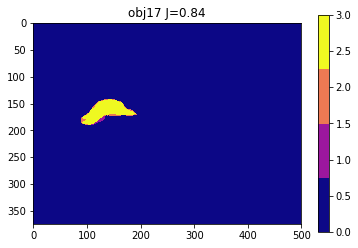

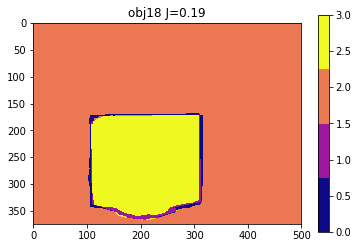

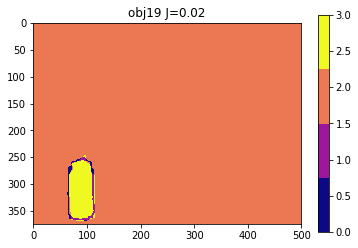

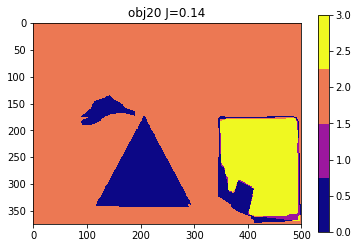

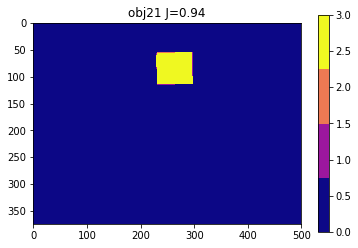

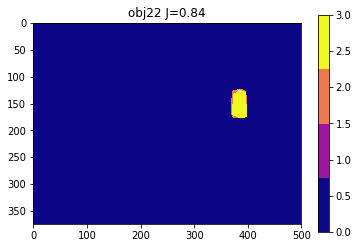

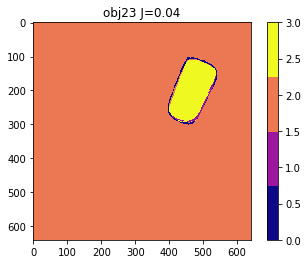

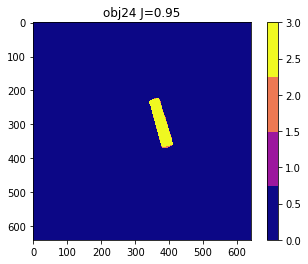

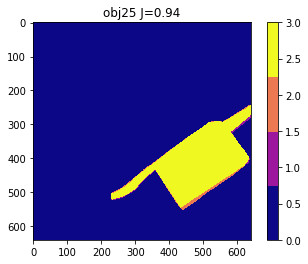

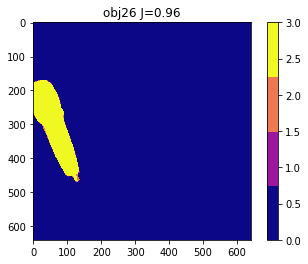

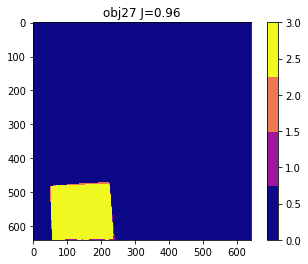

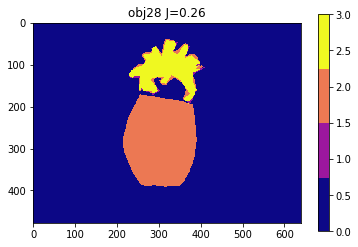

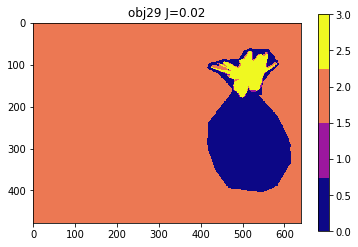

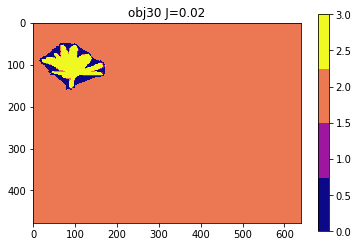

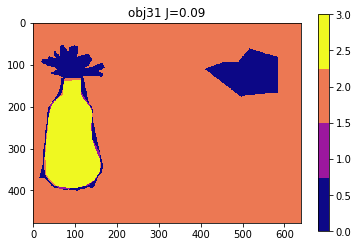

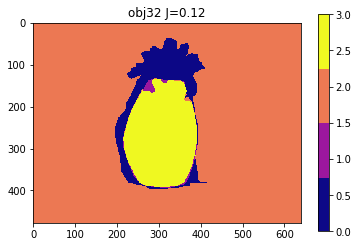

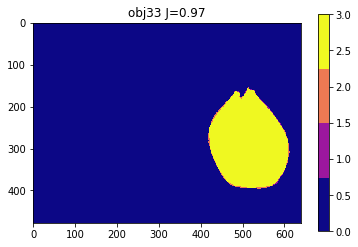

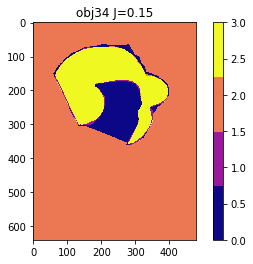

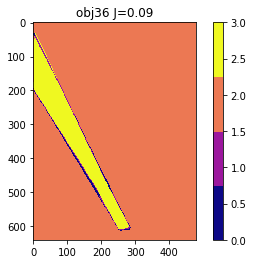

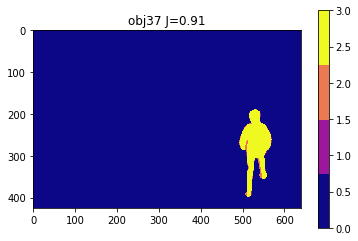

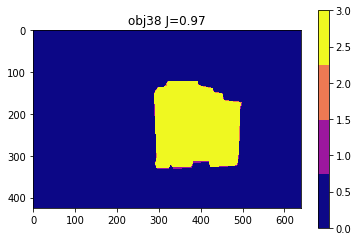

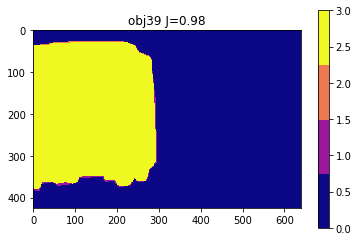

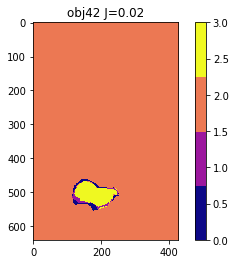

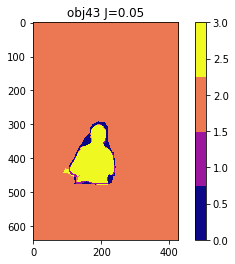

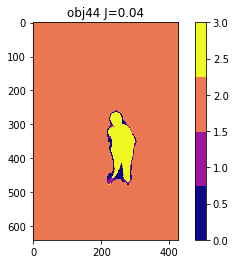

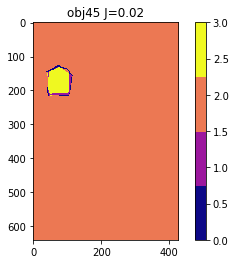

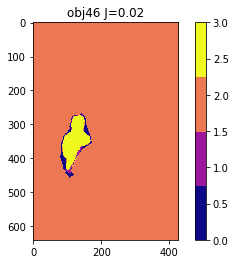

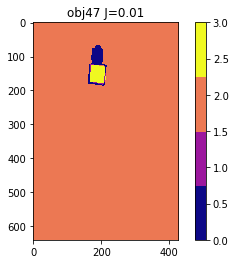

In [71]:
for objid in object_lst:
    visually_debug(sample,objid,cluster_id,"GTLSA",0)

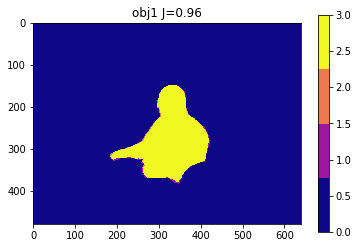

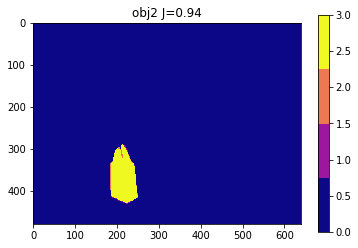

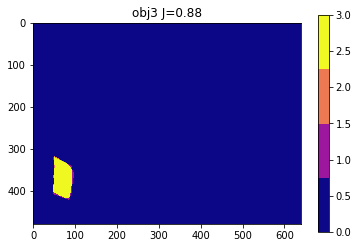

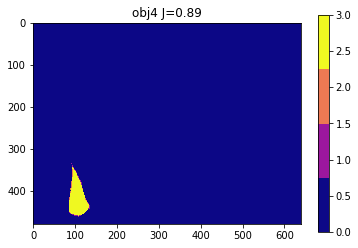

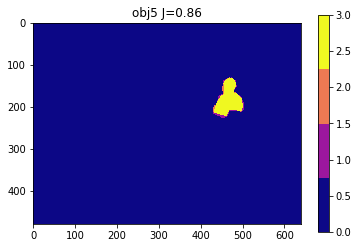

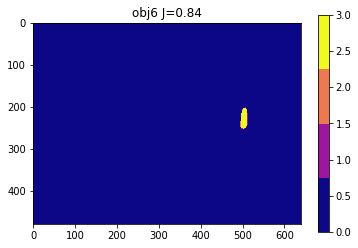

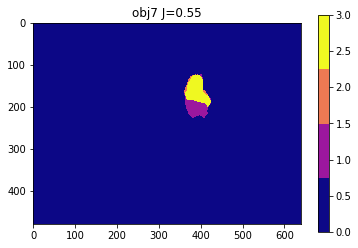

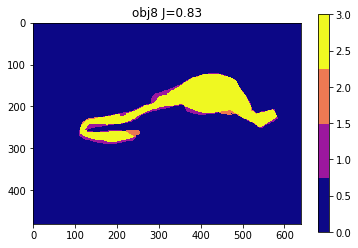

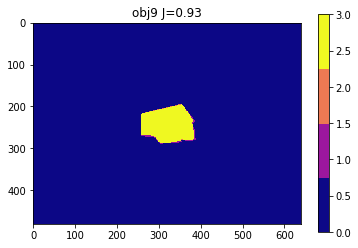

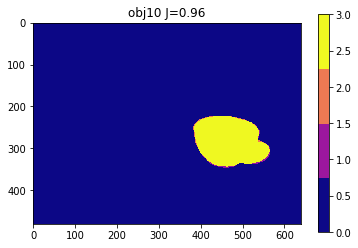

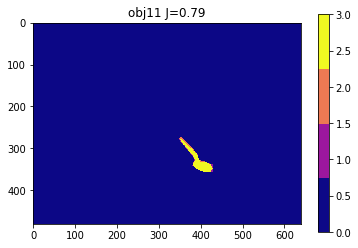

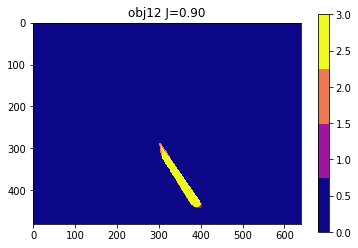

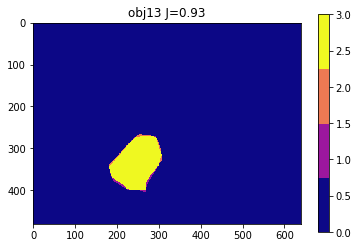

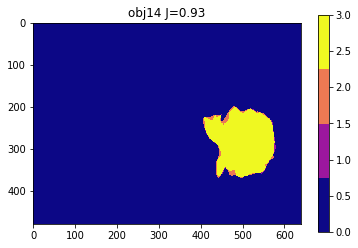

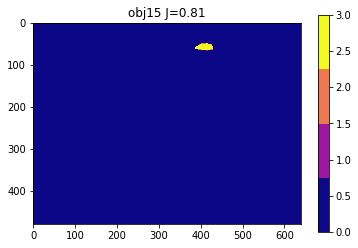

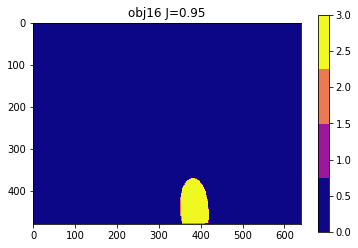

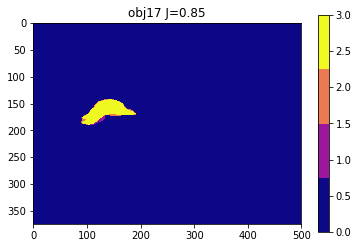

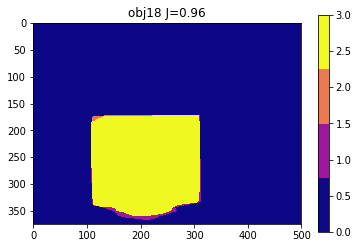

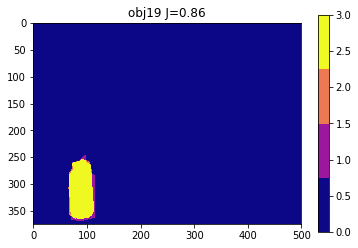

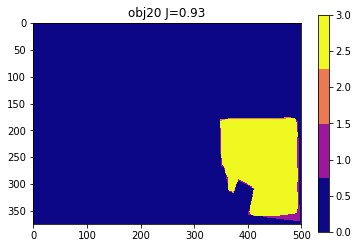

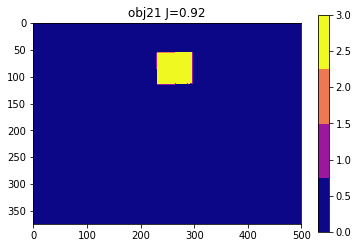

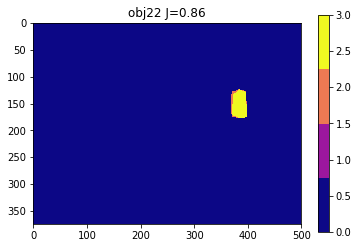

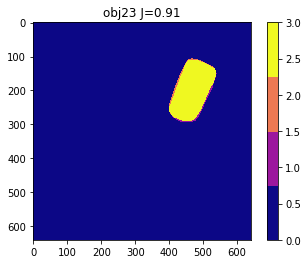

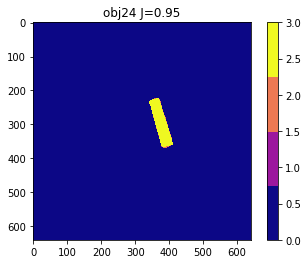

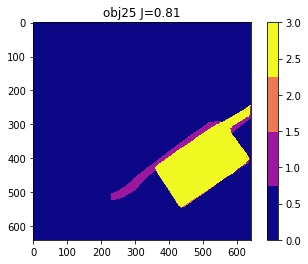

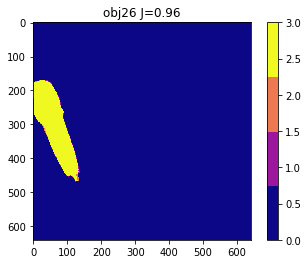

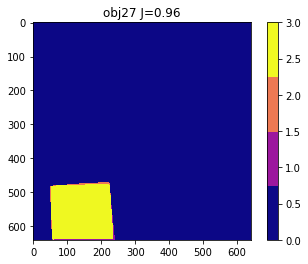

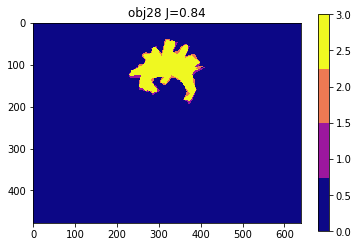

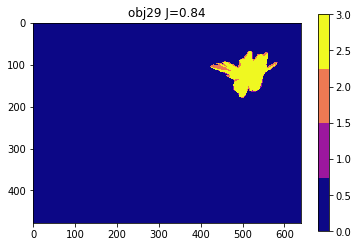

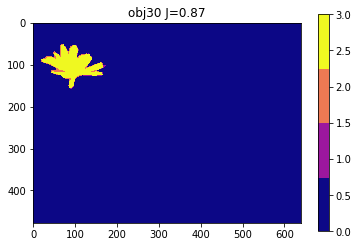

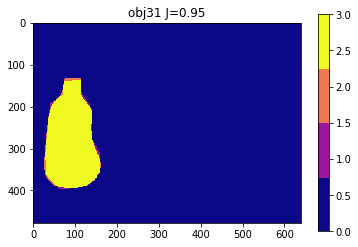

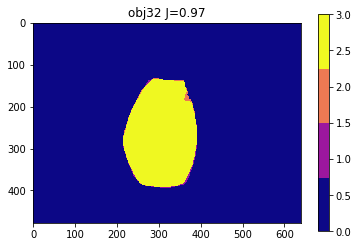

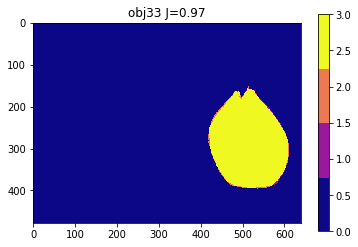

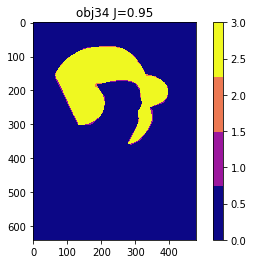

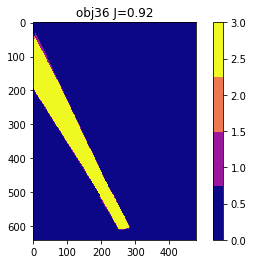

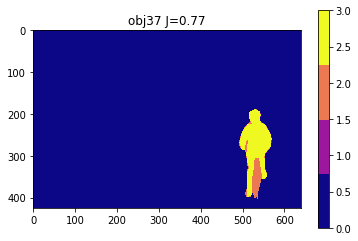

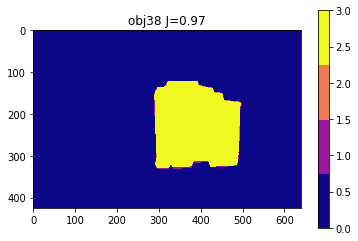

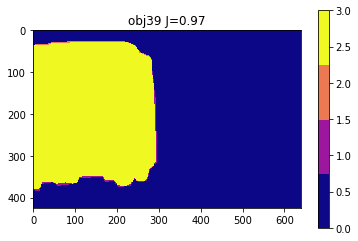

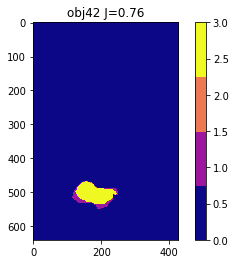

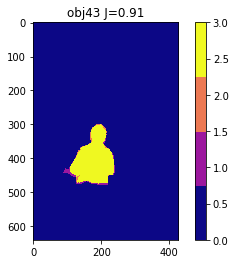

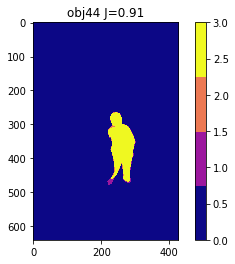

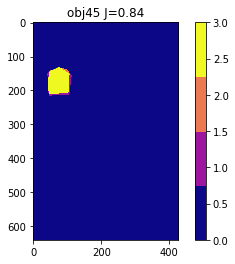

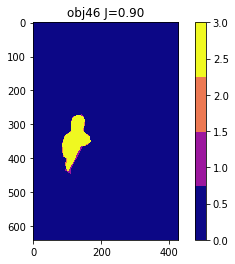

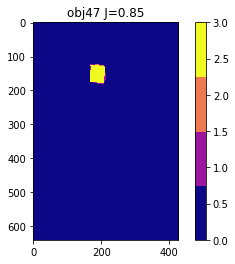

In [72]:
for objid in object_lst:
    visually_debug(sample,objid,cluster_id,"MV",0)

In [51]:
best_clust_best_thresh_df.objid.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       36, 37, 38, 39, 42, 43, 44, 45, 46, 47])

In [53]:
# Look at cases where our algo is performing worse than MV 
best_performing_algo = best_clust_best_thresh_df.sort("j",ascending=False).groupby(['num_workers', u'objid', 'sample_num'], as_index=False).first()
#df.sort("j",ascending=False).groupby(["sample_num","num_workers","objid","clust","algo"], as_index=False).first()

In [59]:
# cases where MV does better than everyone else
best_performing_algo[best_performing_algo["algo"]=="MV"].head()

,num_workers,objid,sample_num,clust,algo,j,p,r,thresh
8,5,1,8,0,MV,0.973964,0.990723,0.982929,0
54,5,6,4,-1,MV,0.816406,0.900862,0.896996,0
60,5,7,0,1,MV,0.866843,0.909556,0.948610,0
65,5,7,5,1,MV,0.866843,0.909556,0.948610,0
108,5,11,8,-1,MV,0.815410,0.886679,0.910272,0


In [74]:
num_workers=5
sample_num=8
sample = "{}workers_rand{}".format(num_workers,sample_num)
objid=1
cluster_id=0
algo="GTLSA"

In [75]:
best_clust_no_thresh_df[(best_clust_no_thresh_df["num_workers"]==5)&(best_clust_no_thresh_df["objid"]==1)&(best_clust_no_thresh_df["sample_num"]==8)&(best_clust_no_thresh_df["clust"]==0)&(best_clust_no_thresh_df["thresh"]==0)]

,J [MV],P [MV],R [MV],clust,num_workers,objid,sample_num,thresh,P [GT],R [GT],...,J [isoGT],P [GTLSA],R [GTLSA],J [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],P [basic],R [basic],J [basic]
267,0.973964,0.990723,0.982929,0,5,1,8,0,0.974324,0.994195,...,0.973383,0.083372,0.971089,0.083166,0.974036,0.979988,0.955039,0.990723,0.982929,0.973964


GTLSA failed very badly here

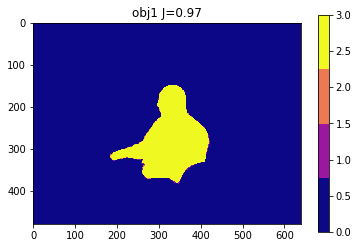

In [77]:
visually_debug(sample,objid,cluster_id,"isoGT",0)

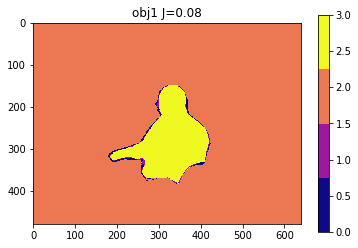

In [76]:
visually_debug(sample,objid,cluster_id,"GTLSA",0)

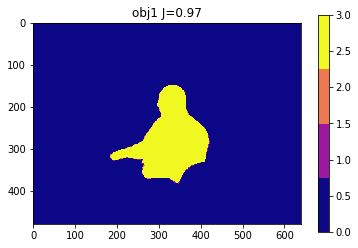

In [63]:
visually_debug(sample,objid,cluster_id,"MV",0)

In [42]:

def twoMaskOverlay(A,B):
    plt.figure()
    #plt.title("Two Masks Overlay")
    cmap = plt.get_cmap('plasma', 4)
    mask = np.zeros_like(A)
    idx = np.where((A==0)&(B==0))
    for i in zip(*idx): mask[i]=0 
    idx = np.where((A==0)&(B==1))
    for i in zip(*idx): mask[i]=1 
    idx = np.where((A==1)&(B==0))
    for i in zip(*idx): mask[i]=2 
    idx = np.where((A==1)&(B==1))
    for i in zip(*idx): mask[i]=3 
    plt.imshow(mask,cmap=cmap)
    plt.colorbar()

# Debugging GTLSA 

In [5]:
num_workers=20
sample_num=3
sample = "{}workers_rand{}".format(num_workers,sample_num)
objid=18
cluster_id=0
algo="isoGTLSA"
thresh=0

In [6]:
PIXDIR = "pixel_em/{}/obj{}/clust{}/".format(sample,objid,cluster_id)
pInT = pkl.load(open("{}{}_p_in_mask_ground_truth.pkl".format(PIXDIR,algo)))
pNotInT = pkl.load(open("{}{}_p_not_in_ground_truth.pkl".format(PIXDIR,algo)))
gt = get_gt_mask(objid)*1.

In [7]:
print PIXDIR

pixel_em/20workers_rand3/obj18/clust0/


In [8]:
gt_est = deriveGTinGroundTruthExperiments(sample,objid,algo,[thresh],cluster_id,exclude_isovote=False,SAVE_GT_MASK=False,rerun_existing=True)

In [9]:
faster_compute_prj(gt_est,gt)

(0.18852046476639914, 0.9525306937190671, 0.18676581759303443)

In [11]:
# twoMaskOverlay(gt_est,gt)

In [26]:
GroundTruth_doM_once(sample, objid, "GTLSA",cluster_id=0, num_iterations=2,rerun_existing=True,exclude_isovote=True)

Doing GroundTruth_doM_once, algo=GTLSA,exclude_isovote=True
inside gt split:  127 1
inside ngt split:  45 2
2.0 152059.0 76030.5 128
1.0 223.0 112.0 47
area_thresh_gt,area_thresh_ngt: 76030.5 112.0
inside gt split:  127 1
inside ngt split:  45 2
2.0 152059.0 76030.5 128
1.0 223.0 112.0 47
area_thresh_gt,area_thresh_ngt: 76030.5 112.0
inside gt split:  127 1
inside ngt split:  45 2
2.0 152059.0 76030.5 128
1.0 223.0 112.0 47
area_thresh_gt,area_thresh_ngt: 76030.5 112.0
inside gt split:  127 1
inside ngt split:  45 2
2.0 152059.0 76030.5 128
1.0 223.0 112.0 47
area_thresh_gt,area_thresh_ngt: 76030.5 112.0
inside gt split:  127 1
inside ngt split:  45 2
2.0 152059.0 76030.5 128
1.0 223.0 112.0 47
area_thresh_gt,area_thresh_ngt: 76030.5 112.0
inside gt split:  127 1
inside ngt split:  45 2
2.0 152059.0 76030.5 128
1.0 223.0 112.0 47
area_thresh_gt,area_thresh_ngt: 76030.5 112.0
inside gt split:  127 1
inside ngt split:  45 2
2.0 152059.0 76030.5 128
1.0 223.0 112.0 47
area_thresh_gt,area_

In [17]:
qp1 = pkl.load(open("pixel_em/20workers_rand3/obj18/clust0/isoGTLSA_qp1_ground_truth.pkl"))
qp2 = pkl.load(open("pixel_em/20workers_rand3/obj18/clust0/isoGTLSA_qp2_ground_truth.pkl"))
qn1 = pkl.load(open("pixel_em/20workers_rand3/obj18/clust0/isoGTLSA_qn1_ground_truth.pkl"))
qn2 = pkl.load(open("pixel_em/20workers_rand3/obj18/clust0/isoGTLSA_qn2_ground_truth.pkl"))

In [24]:
tiles = pkl.load(open("pixel_em/20workers_rand3/obj18/clust0/tiles.pkl"))

In [25]:
tarea = [len(t) for t in tiles]

In [ ]:
np.where(tarea>)

In [18]:
qp1

{6: 0.0,
 33: 0.0,
 54: 0.0,
 81: 0.0,
 116: 0.0,
 175: 0.0,
 194: 0.0,
 209: 0.0,
 211: 0.0}

In [19]:
qp2

{6: 0.9844364780974032,
 33: 0.9637434059048119,
 54: 0.9698638920462825,
 81: 0.9493748360584069,
 116: 0.9881087697822856,
 175: 0.9626941797091312,
 194: 0.9819008481245082,
 209: 0.9430794788843229,
 211: 0.940806155460348}

In [21]:
qn1

{6: 0.7955124936257012,
 33: 0.9739928607853137,
 54: 0.9969403365629781,
 81: 0.9969403365629781,
 116: 0.9321774604793472,
 175: 0.9969403365629781,
 194: 0.9321774604793472,
 209: 0.9969403365629781,
 211: 1.0}

In [22]:
qn2

{6: 0.30994152046783624,
 33: 0.6120857699805068,
 54: 0.6998050682261209,
 81: 0.7387914230019493,
 116: 0.7446393762183235,
 175: 0.7076023391812866,
 194: 0.35282651072124754,
 209: 0.7485380116959064,
 211: 0.8518518518518519}